In [21]:
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.ticker as ticker
import pandas as pd
import scipy

import scienceplots
plt.style.use('science')

plt.rcParams.update({'font.size': 11})

In [14]:
h1 = mr.MesaData("low_mass_exercise2/LOGS/history.data")
h2 = mr.MesaData("low_mass/LOGS/history.data")

FileNotFoundError: low_mass_exercise2/LOGS/history.data not found.

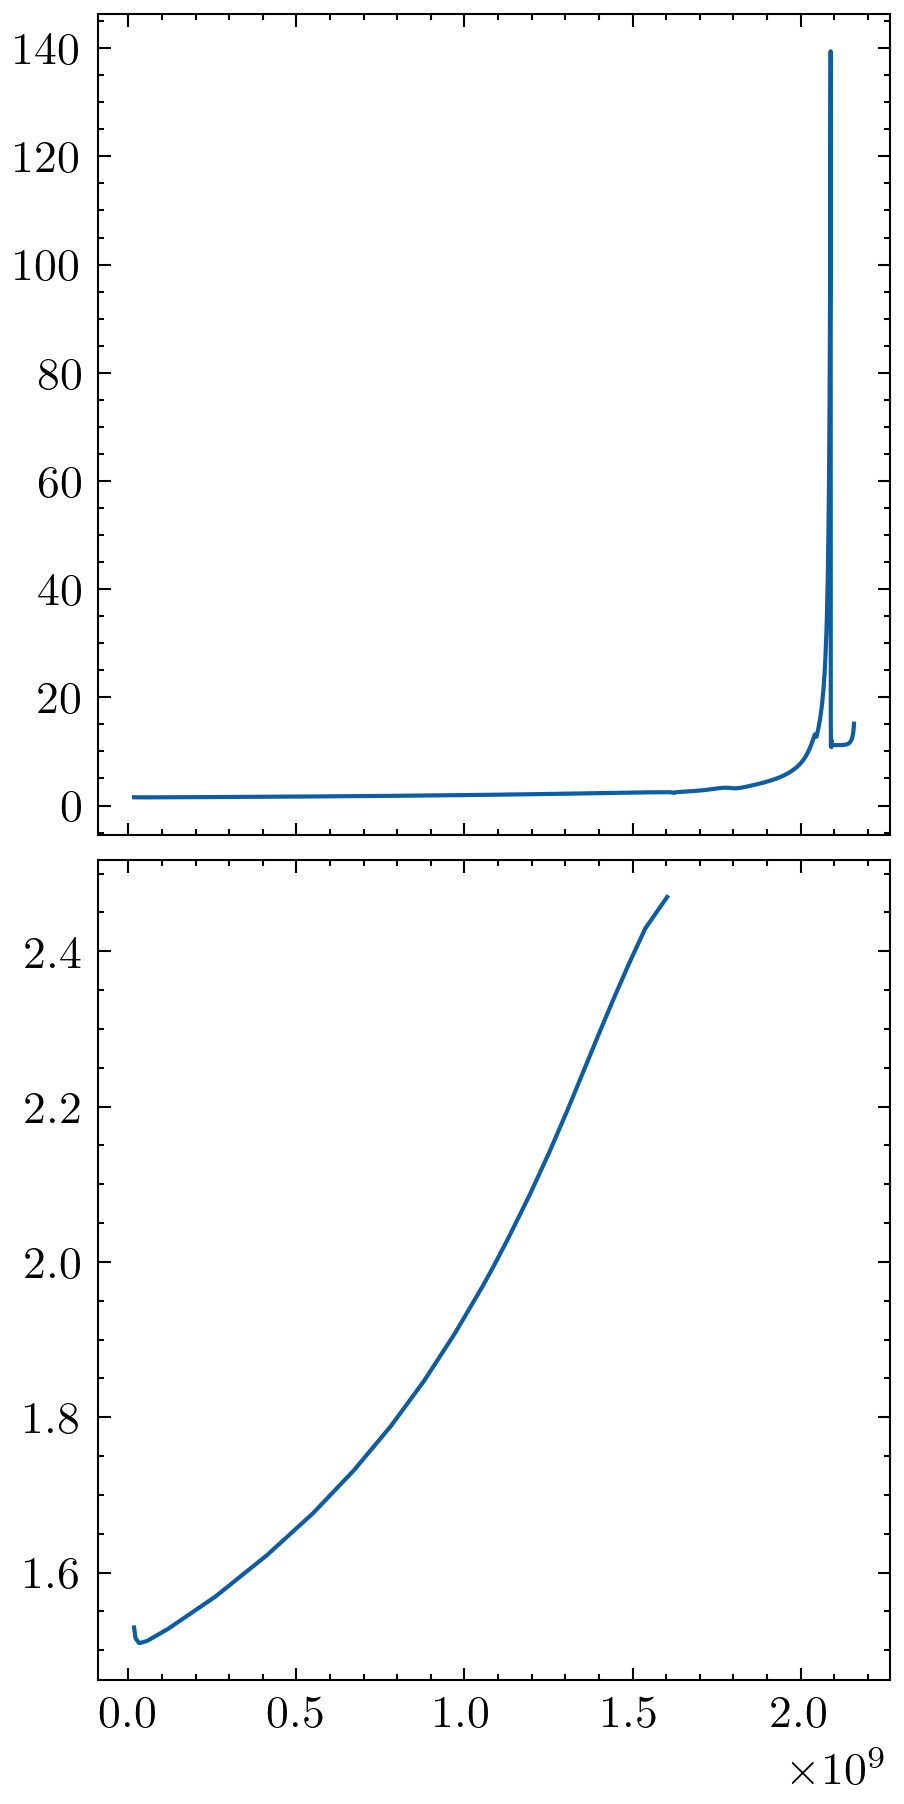

In [ ]:
mask1 = h1.log_Lnuc / h1.log_L > 0.99 
mask2 = h2.log_Lnuc / h2.log_L > 0.99

radius1 = 10**h1.log_R[mask1]
radius2 = 10**h2.log_R[mask2]

star_age1 = h1.star_age[mask1]
star_age2 = h2.star_age[mask2]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3, 6), sharex=True, dpi=300, layout="constrained")

ax1.plot(star_age1, radius1)
ax2.plot(star_age2, radius2)


### Q.4.3

In [29]:
l = mr.MesaLogDir("low_mass/LOGS")

In [30]:
# Define predicate function
def hot_core(logT):
    return logT > 6

# Select model numbers (i.e., profile numbers) where log_center_T > 6
model_nums = l.select_models(hot_core, 'log_center_T')

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through selected models
for m in model_nums:
    prof = l.profile_data(m)
    age = prof.star_age  # scalar
    mass = prof.data('mass')  # 1D array
    h2_abundance = prof.data('h2')  # 1D array

    # Expand star_age into an array for plotting
    age_array = np.full_like(mass, age)

    # Scatter plot
    plt.scatter(age_array, mass, c=h2_abundance, cmap='viridis', s=1, edgecolors='none')

# Final plot formatting
plt.xlabel('Star Age (years)')
plt.ylabel('Mass Coordinate (M_sun)')
cbar = plt.colorbar()
cbar.set_label('H2 Abundance')
plt.title('Profiles with log_center_T > 6')
plt.tight_layout()
plt.show()

KeyError: "'h2' is not a valid data type."

<Figure size 1000x600 with 0 Axes>